In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore

In [38]:
df = pd.read_csv("C:/Users/hp/Downloads/data/data/sierraleone-bumbuna.csv") 

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
#summary statistics
statistics = df.describe()


print(statistics)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [7]:
# Summary statistics for numeric columns
df[['GHI', 'DNI', 'DHI', 'Tamb']].describe()

,GHI,DNI,DHI,Tamb
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,26.319394
std,298.495150,218.652659,158.946032,4.398605
min,-19.500000,-7.800000,-17.900000,12.300000
25%,-2.800000,-0.300000,-3.800000,23.100000
50%,0.300000,-0.100000,-0.100000,25.300000
75%,362.400000,107.000000,224.700000,29.400000
max,1499.000000,946.000000,892.000000,39.900000


In [8]:
#Data quality check

# Check for missing values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [31]:
# Check for duplicates
df.duplicated().sum()

0

In [33]:
outliers = (zscores > 3).any(axis=1)
outliers = (zscores.abs() > 3).any(axis=1)
outliers.sum()

11548

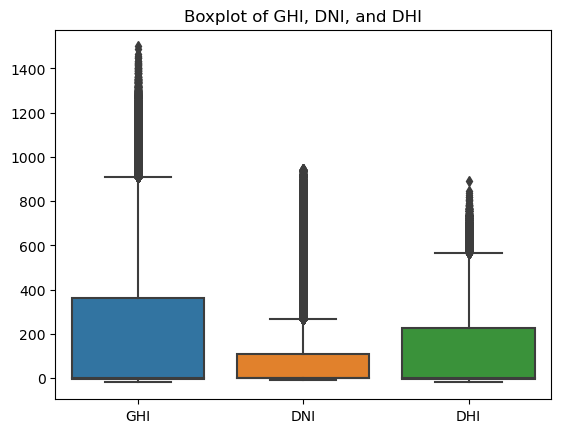

In [13]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of GHI, DNI, and DHI')
plt.show()

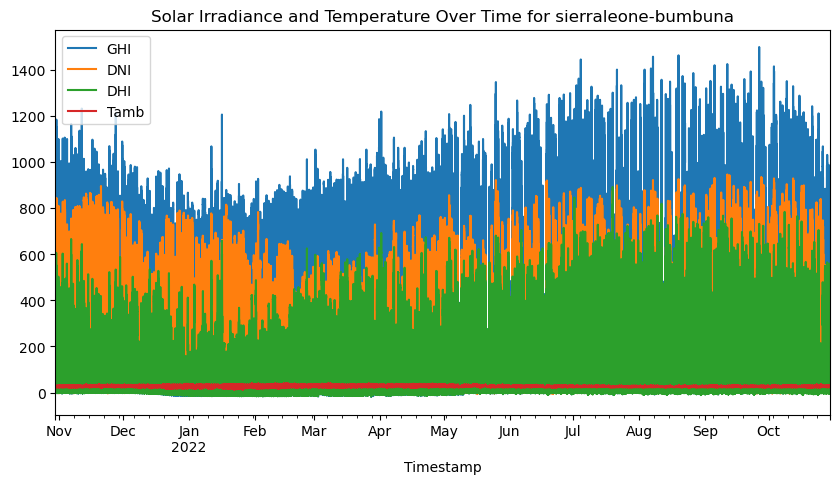

In [39]:
# Plotting time series trends for sierraleone-bumbuna dataset for the numeric columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 5), title='Solar Irradiance and Temperature Over Time for sierraleone-bumbuna')
plt.show()

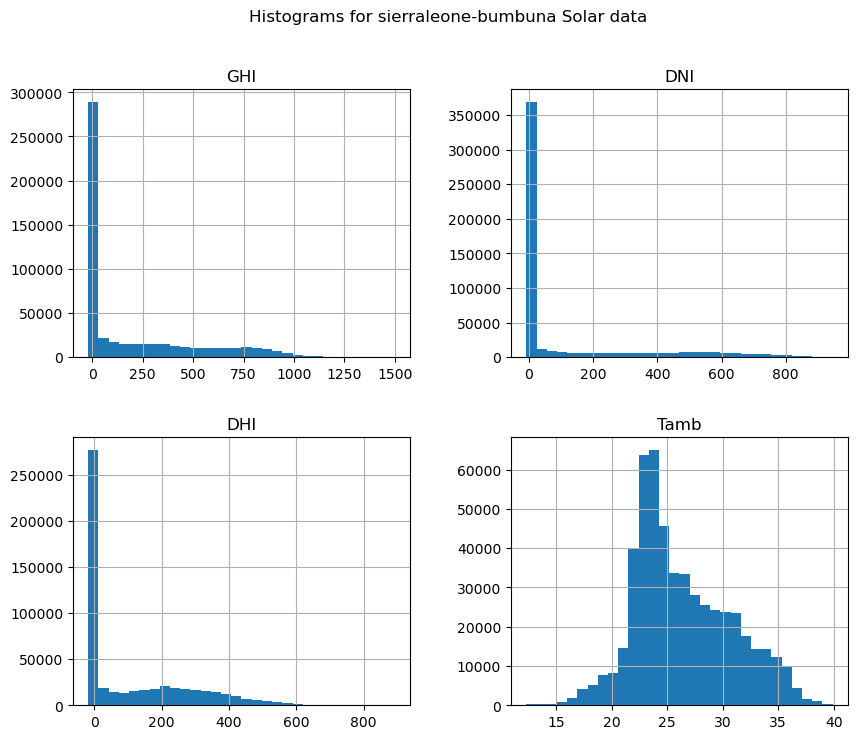

In [40]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms for sierraleone-bumbuna Solar data')
plt.show()

In [17]:
zscores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
# zscores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
# zscores = df.apply(zscore)
zscores

,GHI,DNI,DHI
Timestamp,,,
2021-10-30 00:01:00,-0.678931,-0.532701,-0.720500
2021-10-30 00:02:00,-0.678931,-0.532701,-0.720500
2021-10-30 00:03:00,-0.678931,-0.532701,-0.720500
2021-10-30 00:04:00,-0.678931,-0.532243,-0.720500
2021-10-30 00:05:00,-0.678931,-0.532701,-0.720500
...,...,...,...
2022-10-29 23:56:00,-0.681946,-0.532701,-0.733712
2022-10-29 23:57:00,-0.682281,-0.532701,-0.734342
2022-10-29 23:58:00,-0.682281,-0.532701,-0.734971


<Axes: >

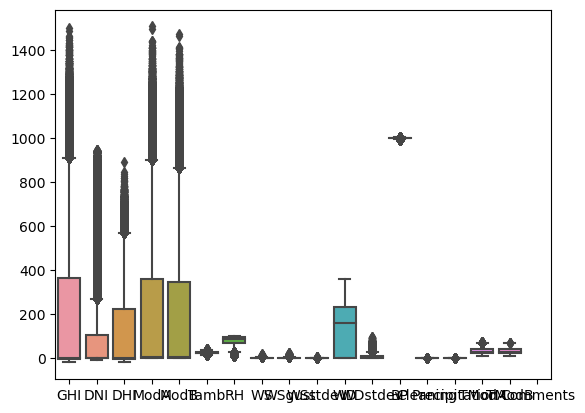

In [18]:
sns.boxplot(data=df)

In [19]:
# missing data forward fill
df.fillna(method='ffill', inplace=True)

In [20]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
#correlition analysis
correlation = df.corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.867930,0.863752,0.994981,0.994536,0.636462,-0.538373,0.359166,0.399049,0.398856,0.390845,0.533299,-0.131493,0.008117,-0.064772,0.922058,0.911062,NaN
DNI,0.867930,1.000000,0.531411,0.875382,0.873853,0.574224,-0.543391,0.301604,0.331984,0.327648,0.304552,0.464238,-0.209031,0.002169,-0.055228,0.814842,0.806502,NaN
DHI,0.863752,0.531411,1.000000,0.847930,0.848488,0.562221,-0.420181,0.333539,0.371769,0.374547,0.388911,0.469965,-0.048909,0.017516,-0.064364,0.805393,0.804426,NaN
ModA,0.994981,0.875382,0.847930,1.000000,0.999114,0.632362,-0.556695,0.354118,0.394075,0.395892,0.380392,0.535554,-0.135624,0.006278,-0.064829,0.927316,0.911780,NaN
ModB,0.994536,0.873853,0.848488,0.999114,1.000000,0.628886,-0.549673,0.352445,0.392338,0.394518,0.380185,0.533385,-0.130385,0.007918,-0.064662,0.925702,0.910481,NaN
Tamb,0.636462,0.574224,0.562221,0.632362,0.628886,1.000000,-0.789255,0.530637,0.548392,0.472358,0.480121,0.564234,-0.510249,-0.011999,-0.065580,0.829386,0.853007,NaN
RH,-0.538373,-0.543391,-0.420181,-0.556695,-0.549673,-0.789255,1.000000,-0.456895,-0.467883,-0.395608,-0.326466,-0.496062,0.569804,0.011557,0.086139,-0.682245,-0.692811,NaN
WS,0.359166,0.301604,0.333539,0.354118,0.352445,0.530637,-0.456895,1.000000,0.973372,0.721450,0.551855,0.633132,-0.282799,-0.014140,0.124502,0.424285,0.443836,NaN
WSgust,0.399049,0.331984,0.371769,0.394075,0.392338,0.548392,-0.467883,0.973372,1.000000,0.834529,0.612784,0.690607,-0.266130,-0.012790,0.129254,0.462408,0.479276,NaN
WSstdev,0.398856,0.327648,0.374547,0.395892,0.394518,0.472358,-0.395608,0.721450,0.834529,1.000000,0.679596,0.715051,-0.176564,-0.007934,0.097686,0.449360,0.456136,NaN


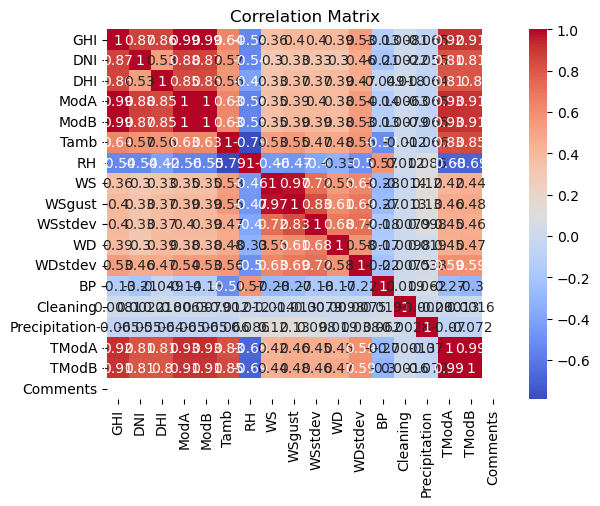

In [22]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

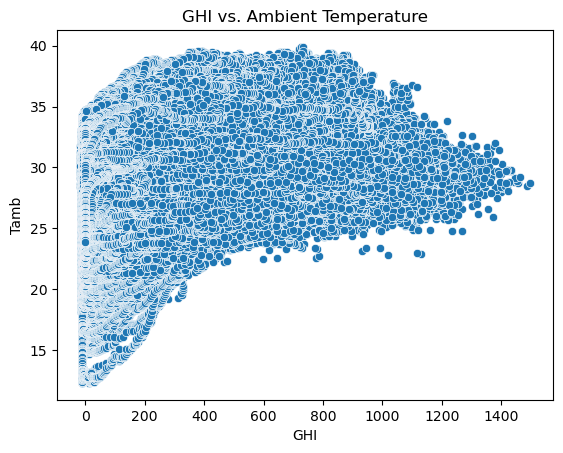

In [23]:
#scatter plot
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('GHI vs. Ambient Temperature')
plt.show()

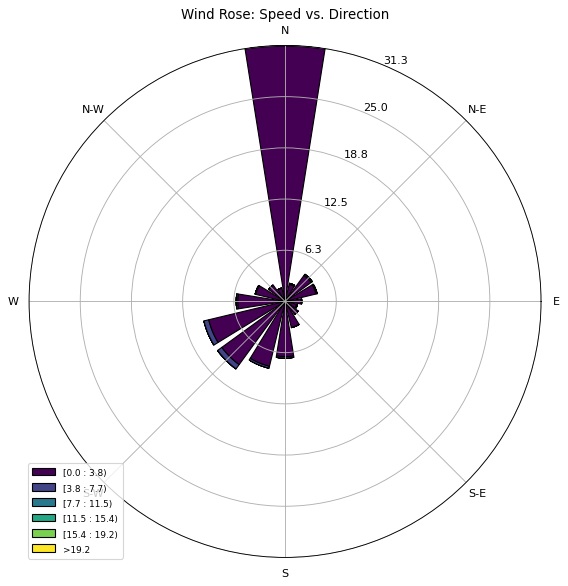

In [24]:
#wind analysis
from windrose import WindroseAxes

# Create a wind rose visualization to analyze speed and direction
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed vs. Direction')
ax.set_legend()
plt.show()

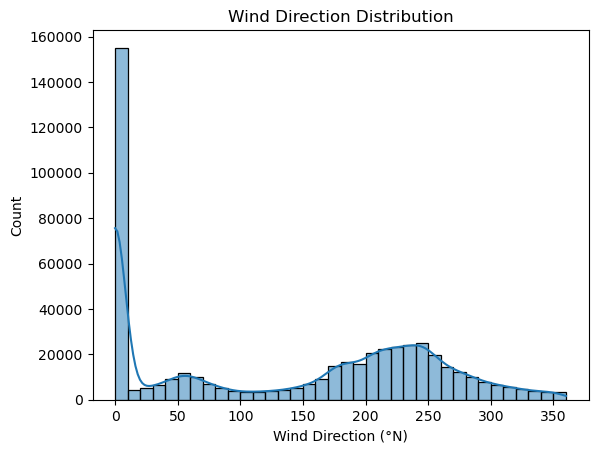

In [25]:
# Analyze wind direction variability
sns.histplot(df['WD'], kde=True, bins=36)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.show()

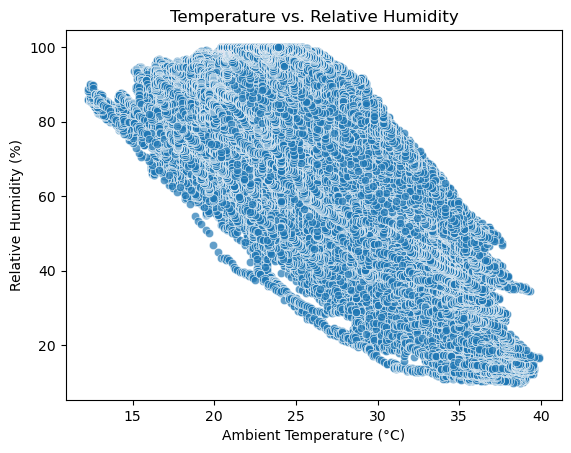

In [26]:
# Analyze the relationship between temperature and relative humidity
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

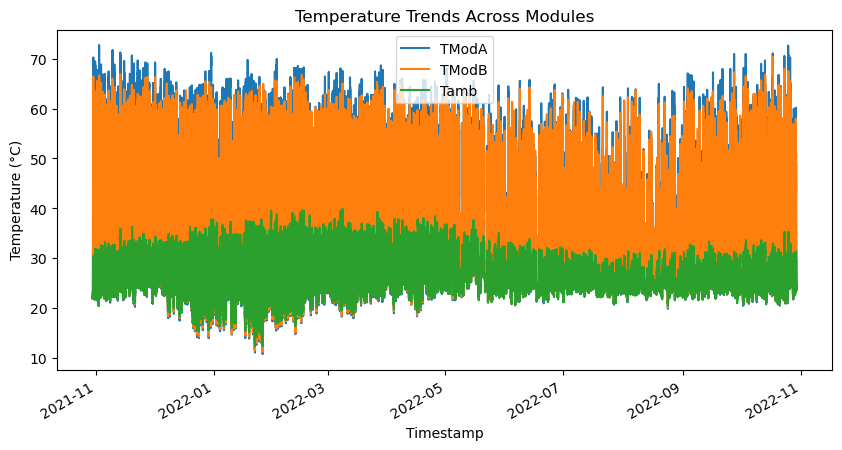

In [27]:
# Investigate temperature variations across modules
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(10, 5))
plt.title('Temperature Trends Across Modules')
plt.ylabel('Temperature (°C)')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


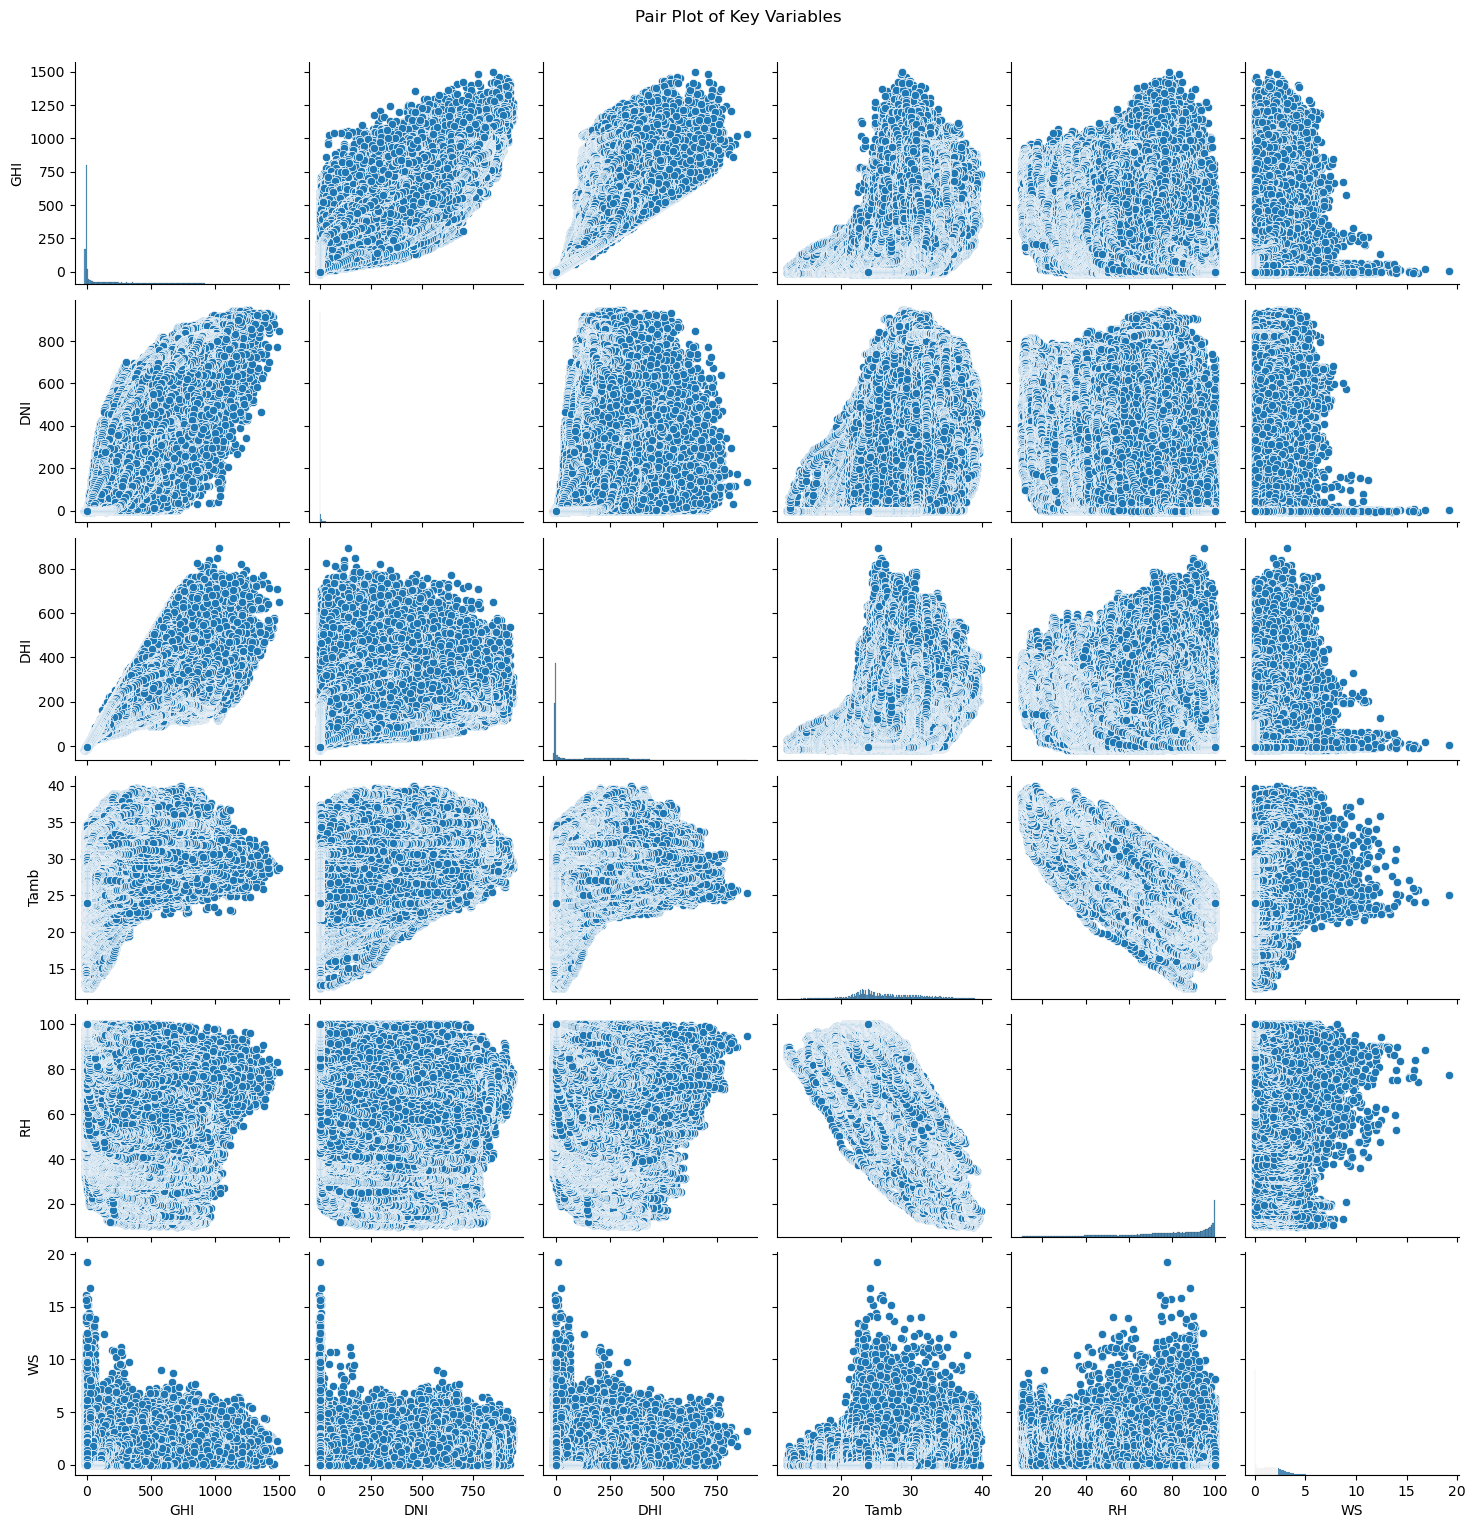

In [28]:
# Generate a pair plot
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [29]:
# Identify strong correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

# Correlation Matrix
correlation_matrix

,GHI,DNI,DHI,Tamb,RH,WS
GHI,1.000000,0.867930,0.863752,0.636462,-0.538373,0.359166
DNI,0.867930,1.000000,0.531411,0.574224,-0.543391,0.301604
DHI,0.863752,0.531411,1.000000,0.562221,-0.420181,0.333539
Tamb,0.636462,0.574224,0.562221,1.000000,-0.789255,0.530637
RH,-0.538373,-0.543391,-0.420181,-0.789255,1.000000,-0.456895
WS,0.359166,0.301604,0.333539,0.530637,-0.456895,1.000000
